[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mayo-Radiology-Informatics-Lab/MIDeL/blob/main/chapters/8B.ipynb)

*Authors: Jaidip Jagtap, PhD; Joe Sobek, MS*

# **Section 8-B: Components of Deep Learning Models** #

# 1. **Introduction**

Deep Learning Models are complex networks of algorithms that can automatically learn and improve from experience. They have become increasingly popular in recent years due to their ability to process vast amounts of data and provide accurate results in a variety of fields, including computer vision and natural language processing.

One of the key features of deep learning is the ability to automatically learn hierarchical representations of data through the use of deep neural networks. In this context, several types of deep learning models have been proposed, each with its own unique architecture and characteristics. In this article, we will explore a few popular deep learning models, namely Inception, DenseNet, and U-Net/V-Net, which have been widely used in various applications such as image segmentation, object detection, and medical imaging. U-Nets and V-Nets models consist of Encoders and Decoders, Skip connections, Cross connections, and various other components. We will discuss the key components of each model and their respective advantages and limitations.

In this article, we will provide an overview of these components of deep learning models, including their architecture, strengths, and weaknesses. By the end of this article, you will have a better understanding of these deep learning models and their potential applications in solving real-world problems. 

# 2. **InceptionNet**

Early attempts to improve neural network performance focused on improving performance by making networks wider or deeper, creating larger neural networks with more parameters.  Large networks such as these have the potential for great analytical power, but they present new challenges for AI researchers.  For example, large networks are more vulnerable to overfitting.  With more parameters, more computational power is required to train large networks.  However, there’s no guarantee that a network will use all of its parameters, and without careful training large networks often finish training with many weights close to zero or unused.

InceptionNet, or GoogLeNet as the first iteration was called, was designed to avoid these issues while pushing the envelope of neural network performance.  InceptionNet was inspired by an earlier network-in-network paper, which focused on adding 1x1 convolutions, and named after the movie Inception, because the developers’ aim was to “go deeper” and further expand on the network-in-network concept by making the subnetworks of the earlier paper more complex.

Compared to less complex architectures like VGG, InceptionNet is built with far fewer parameters, using about 6 million in comparison to the nearly 140 million parameters used by VGG or the 60 million parameters used by larger ResNets.  Later iterations of InceptionNet are larger, with about 27 million parameters, and similar in size to Resnet50.  The lower number of parameters helps reduce overfitting in InceptionNet models and allows the models to be used with less computational resources.  This reduction in size is possible because InceptionNet uses smaller convolutional kernels and reduces the number of fully connected layers, which can require many parameters, replacing some of them with average pooling layers.

<br> <img src="https://i.ibb.co/7J1xFz3/Google-Le-Net.png" alt="Google-Le-Net" border="0"> <u><br><b>Figure 1.</b> The InceptionNet architecture. [[source](https://arxiv.org/abs/1409.4842)]  </u><br><br> 

In order to keep weights in the center of the network learning and to help ensure they contribute during inference, InceptionNet adds auxiliary classifiers, shown in the red boxes.  These are very small CNNs which make a prediction using the output from an intermediate layer.  The loss from this prediction is weighted and then added to the total loss.



## 2.1. **Inception Modules**

Similar to the neural networks we discussed in the beginner section, InceptionNets are organized into a number of modules which are repeatable units made from several different layers.  However, as pictured above, Inception modules have major differences from ResNet modules.  First, layers in the module are organized in parallel rather than serially.  Second, the convolutional layers within the module all use different sized kernels.

These differences allow Inception modules to simultaneously analyze features of different sizes as data passes through the network and the features available in it change scale.  Along with the ability to look at features of different spatial scale using the 3x3 and 5x5 convolutional layers, Inception modules include a 1x1 convolutional layer to identify cross-channel correlations and a max pooling layer, which acts like a residual connection and allows the network to analyze features in the input data at many different scales.  The output from these convolutions is concatenated, passed through a ReLU activation, and then passed to the next Inception module.

<br> <img src="https://i.ibb.co/MBS6Bm1/Inception-modulea.png" alt="Inception-modulea" border="0"> <u><br><b>Figure 2a.</b>  The original Inception module. [[source](https://arxiv.org/abs/1409.4842)]  </u><br><br> 

The simple Inception module we just discussed comes with a major drawback: large convolutional kernels, e.g. 5x5 or larger, are computationally expensive.  This makes networks built with large numbers of the simple Inception module very slow.  To address this, the InceptionNet paper included an improved variant, shown above.  This redesign of the Inception module adds 1x1 convolutions before the 3x3 and 5x5 convolutions.  These reduce the number of channels entering the 3x3 and the 5x5 convolutions, which makes it possible to reduce the total number of computations.  Newer versions of the InceptionNet architecture make further changes to the Inception module.  We’ll discuss these versions, and what changes they made, in the next section.


<br> <img src="https://i.ibb.co/dcz65NC/Inception-module-b.png" alt="Inception-module-b" border="0"> <u><br><b>Figure 2b.</b>  The improved Inception module. [[source](https://arxiv.org/abs/1409.4842)]  </u><br><br> 


## 2.2. **InceptionNet Variants**

Above, we discussed the design principles used in the first variant of InceptionNet, commonly called InceptionNetV1.  In this section we’ll discuss further evolutions to the architecture.

<br><img src="https://i.ibb.co/YdkBFSz/Inception-module-v2.png" alt="Inception-module-v2" border="0"> <u><br><b>Figure 3.</b>  The V2 Inception module. [[source](https://arxiv.org/abs/1512.00567v3)]  </u><br><br> 
 

  In a subsequent paper, the authors of the InceptionNet paper further refine the guiding principles used to develop InceptionNets to increase the architecture’s efficiency and performance. In relatively simple terms, these principles are:






1.   Slowly decrease the resolution of the data as it passes through the network.
2.   Networks train faster when many channels analyze data at coarse resolutions.
3.   Reducing the number of channels before spatial (e.g. 3x3) convolutions only slightly reduces a network’s analytical power.
4.   Optimal models will generally balance width and depth.



However, the paper cautions that these principles must be used carefully and are best applied when encountering problems with otherwise unclear solutions.

According to these principles, the authors make several changes to the InceptionNet architecture and implement different Inception modules at different depths of the network.  First, they remove the 5x5 convolutions and replace them with a pair of 3x3 convolutions in series.  As discussed in the beginner section of this chapter, two serial 3x3 convolutions have the same receptive field as a single 5x5 convolution.  However, where a 5x5 convolution uses 25*N (number of channels) weights, sequential 3x3 convolutions use only 2*9*N weights.

To further reduce the number of weights required by the network, the authors replace some of the square, nxn convolutions with combinations of nx1 and 1xn convolutions.  The authors reported that this did not work well for Inception modules early in the network, but they had success including these asymmetric convolutions in Inception modules near the center of the network.

Additionally, the designers of InceptionNetV2 noticed a couple of trends with InceptionNet’s auxiliary classifiers during development.  First, they discovered that the auxiliary classifiers did not contribute during early stages of training.  Networks with auxiliary classifiers only started outperforming networks without them late in the training process.  Second, removing the lower level auxiliary classifier did not hurt the results.

<br><img src="https://i.ibb.co/j5khRHD/inception-module5.png" alt="inception-module5" border="0"> <u><br><b>Figure 4.</b>  Downsampling Inception modules as used by InceptionNetV2. [[source](https://arxiv.org/abs/1512.00567)]  </u><br><br> 

Finally, InceptionNetV2 adopts a new method to downsample and expand the channel/feature dimension as data passes through the network.  Rather than expanding the channels before a pooling layer, which has a high computational cost, or using a single convolution to pool the data before expanding the channels, which creates a representational bottleneck and causes information loss, InceptionNetV2 uses convolutions and a pooling layer in parallel.

Putting these layers in parallel makes it possible to use 1x1 convolutions to reduce the number of channels going into the pooling convolutions.  As outlined in principle 3 above, this only slightly worsens the network’s analytical power, and the multiple parallel operations can be combined to expand the total number of channels without requiring the downsampling convolutions to calculate over the entirety of the data entering the downsampling module.  This limits the computational resources required for the downsampling without introducing a bottleneck.




## 2.3. **InceptionNetV3**

InceptionNetV3 is a small evolution to InceptionNetV2 and is introduced in the same paper.  Rather than major architectural changes, it is a combination of several small changes to the training methodology that were tested as InceptionNetV2 was developed.

First, in order to help the model generalize, the authors implemented label smoothing.  In simple terms, this changes the classification targets from “hard” values such as 0 or 1 to “soft” values like 0.1 and 0.9, which allows models to minimize their loss without requiring layer weights to produce extreme values.  For a more complete discussion on label smoothing, see chapter 9, section 3.

Next, the authors replaced the stochastic gradient descent optimizer used in InceptionNetV1 with the RMSProp optimizer.  This optimizer multiplies the previous step size by a factor determined by whether or not the sign of the gradient matches the sign of the gradient during the previous step.  If the gradients match, it increases the step size, if the gradients do not match, it decreases the step size.

Two final changes are made to the InceptionNet training process.  The first 7x7 convolutional layer is factorized into three 3x3 convolutional layers, and the single auxiliary classifier has batch normalization applied to its final linear layer, instead of only the convolutional layers.  With these changes, InceptionNetV3 further improved on InceptionNetV1’s performance while remaining computationally efficient.


## 2.4. **InceptionNetV4 and Inception-ResNet**

There are two final variants of InceptionNet we’ll discuss, InceptionNetV4 and Inception-ResNet, introduced together in a 2016 paper.  The second and third iterations of InceptionNet were published in December 2015 alongside the first ResNet paper.  Both networks showed similar performance gains over previous networks, and this later paper investigated the combination of key features from each architecture.

InceptionNetV4 is a streamlined evolution of InceptionNetV3.  Due to the frameworks available during their invention, InceptionNetV3 and earlier variants had to account for technical constraints that were removed by developing InceptionNetV4 with the TensorFlow framework.  This allowed the developers to make the Inception modules more uniform and to substantially simplify the overall architecture, which they did to make it easier to study deeper and wider InceptionNet variants.

The good performance of the newly introduced ResNets gave credence to the claim that residual connections are important for training very deep architectures.  Since InceptionNets tend to be very deep, Inception-ResNet was a variant that added residual connections to the InceptionNet architecture.  Their influence resulted in faster convergence for Inception-ResNet in comparison to other InceptionNets.


<br> <img src="https://i.ibb.co/9g0BpHk/im.png" alt="im" border="0"> 

Figure 5. The overall structures of InceptionNetV4 (left) and Inception-ResNet (right). [[source](https://arxiv.org/abs/1602.07261)]  </u><br><br> 


Above are simplified figures representing the basic structures of both InceptionNetV4 and Inception-ResNet.  In the interest of space, we won’t cover each variant of the Inception module used by these models, as their details vary substantially, but taking a moment to look at them in the original paper may be worthwhile.  Instead, we’ll briefly discuss the general strategy used to add residual connections to the InceptionNet architecture.

<br> <img src="https://i.ibb.co/4F4mtQJ/relu.png" alt="relu" border="0">
Figure 6. Visualization of a residual connection in Inception-ResNet.   [[source](https://arxiv.org/abs/1602.07261)]  </u><br><br> 

The figure above reveals that residual blocks in InceptionNets largely resemble those in ResNets.  However, there is an added element, an activation scaling component placed after the Inception module.  This is a layer that scales the residuals by a factor of around 0.1, and was added to address a training instability that occurred for Inception modules with many channels.

Ultimately, Inception-ResNets performed as well as similarly sized InceptionNets without residual connections (like InceptionNetV3 and V4), however the results reported by the authors show them converging significantly faster.  Both variants in this paper, InceptionNetV4 and Inception-ResNet, significantly outperformed InceptionNetV3.




# 3. **DenseNet**

The next major architectural development we’ll discuss came a few years after the InceptionNet architecture and its variants were introduced.  DenseNet, first published in 2018, proposed another strategy to resolve the issues faced by deep CNNs.  Noting that the central point of many architectures developed around that time focused on shortening the “distance” between early and late layers in the network, the authors designed DenseNet to accomplish this in a very straightforward way.  Instead of using skip connections or residual connections between different layers of the network, DenseNet simply concatenates each layer’s input to its output before passing the data to the next layer.

<br>  <img src="https://i.ibb.co/G216R4H/denseblock.png" alt="denseblock" border="0">  Figure 7. A DenseNet made of 3 Dense blocks. [[source](https://arxiv.org/abs/1608.06993)]  </u><br><br> 


## 3.1. **Dense Blocks**

<br> <img src="https://i.ibb.co/J53kVQr/densenet.png" alt="densenet" border="0">

Figure 8. A Dense block with five layers. [[source](https://arxiv.org/abs/1608.06993)]  </u><br><br> 

Like the other architectures we’ve discussed thus far, DenseNets are constructed using a series of repeatable blocks/modules.  As pictured above, these are fairly simple, constructed from a linear arrangement of Dense layers, which combine batch normalization, ReLU, and convolution layers.  The input of each Dense layer is concatenated to its output and then passed to the next Dense layer in the block.  After the Dense block, a transition layer, consisting of a batch normalization layer, a 1x1 convolutional layer, and a 2x2 average pooling layer, downsamples the data before it enters the next Dense block.

While it may seem like a small difference, the use of concatenation instead of summation (as in ResNets) has significant consequences for the behavior of the network.  Concatenation means the classification layers directly see the intermediate features used in the network.  This causes training to act like it has implicit auxiliary classifiers at every layer and keeps a greater portion of the network's weights actively participating in the classification.  It also directly connects every layer to the gradients from the loss function, which alleviates the vanishing gradient problem we discussed alongside ResNets.  An additional advantage is that the network can avoid learning redundant features because every feature is directly passed to later layers.

However, DenseNet has a major problem.  Because the input is concatenated to the output, the computational footprint of a DenseNet can grow very quickly.  To alleviate this, the creators of DenseNet used layers that output relatively few channels, testing “growth rates” varying from 12 to 40 channels in the original paper.  By carefully controlling this growth rate the authors were able to create DenseNets that were able to outperform earlier architectures while requiring fewer overall parameters.


# 4. **UNets**

Convolutional neural networks (CNNs) focus on image classification, where an image is fed to the model, and the output is a label for one of the desired classes (e.g. ‘cat’ or ‘dog’). Traditional CNNs, do not localize the feature responsible for the output label, and it is not possible to segment interested region areas such as the part of an image that is the dog or cat. Ronneberger et al. (2015) developed and applied the UNet model (a U-shaped network having many CNN components) for biomedical image segmentation. UNets are able to localize and distinguish the borders of features by classifying each pixel in an image as either part of the object of interest or not.

The diagram below depicts an overview of the UNet architecture. One can see from this diagnram how the UNet got its name--the architecture is U shaped with left and right ‘arms’. The left part of the UNet, called the encoder, downsamples or contracts the image with convolutions (compressing the spatial x and y directions but expanding the filters). The decoder part on the right expands the feature map back to the input image size using an upsampling technique called transpose convolution. Both of these parts are made with multiple convolutional layers stacked together.

<br>  <img src="https://i.ibb.co/Xk8fv3P/unets.png" alt="unets" border="0">

Figure 9. The schematic of the U-Net architecture. Adapted from [[source](https://arxiv.org/abs/1505.04597)]  </u><br><br> 

## 4.1. **Encoders**


The encoder part contracts the images using CNN and a pooling operation, resulting in a smaller image size in the spatial direction (let's say m and n are the pixels in X-Y spatial planes) but continuing to expand the filter-direction based on the number of filters (or kernels) used. In the above figure, the model received an input image of 572 x 572 x 1 pixels i.e., m = 572 pixels, n = 572 pixels, and 1 channel. The channel value of 1 means that image is grayscale, whereas for RGB, it would have three channels. After the input image is fed to the model shown in figure above, two consecutive times a 3x3 convolution with 64 filters is applied to the input image and followed by 2x2 max-pooling, resulting in a contracted image of 284x284x64 after the first layer. Figure below (A-B) demonstrates the convolution operation with kernel (filter) of 3x3 size was multiplied by the 3x3 matrix from input image that results in output value ‘2’. This kernel was slid over the whole image with stride one. The image produced by the convolution operation is called a feature map. Every convolution is followed by a ReLU activation function that introduces non-linearity into the network. The output of the ReLU activation function is forwarded to the next convolution as well as to the decoder part through the skip connection, explained in the next section. With max-pooling (Figure C) the maximum value from the 2x2 matrix is extracted, and the stride is 2, so the whole feature map gets downsampled to half size in X and Y. Downsampling the feature map size also helps in reducing computational costs. These steps are repeated until the desired number of layers is reached (typically 5-7). These convolutions and max pooling operations extract the detail or fine information about the structure present in the image. In order to maintain expressiveness, there is a need to increase the number of feature maps (channels) as we get deeper in the network from input image to base layer. Adding too many layers to the network is computationally expensive and may not improve performance. Therefore, it is important to find the optimal depth of the network that can effectively learn the task at hand.


<img src="https://i.ibb.co/GWSJkft/convolutions.png" alt="convolutions" border="0">  
Figure 10. Demonstration of convolution and max pooling operations.

The original UNet was for 2D images, but medical images can also be 3D, and there are special versions of UNets (sometimes called V-Nets) that can segment 3D imagesData in medical imaging (MRI, CT, US, etc.) often get recorded in consecutive frames, so the channels in Z can be selected as one or many that could fit in computer memory.


## 4.2. **Skip Connections**

Skip connections transfer the encoder information that helps the decoder to generate better semantic features. Skip connections help with better flow of gradients during backpropagation. This helps the network to learn better representations and improve performance. Due to the depth of the network, the features from the earlier layers get lost where skip connections provide these features' information to the decoder part.


## 4.3. **Decoders**

The decoder part is opposite to contraction where the feature map size gets bigger in dimension and in the end it creates a high-resolution segmentation map. It consists of a sequence of up-convolutions and concatenation with high-resolution features from the contracting path that were flowed through skip connections. The upsampling network can be done with techniques such as nearest neighbors, bed of nails, max unpooling, but the most common is transposed convolutions. The figure below demonstrates the decoder block with transposed convolutions.

In upsampling, the input matrix of 2x2 pixels is processed to output a matrix of 4x4 pixels. In nearest neighbor (A), each pixel value is duplicated along X and Y producing the 4x4 matrix. In bed of nails (B) the ‘one pixel’ value get assigned to first element of new 2x2 matrix and remaining get filled with zero whereas in max unpooling (C) a pixel value gets assigned at same location as in input 2x2 matrix and remaining elements get filled with zero. The most popular upsampling method is the transpose convolution that uses some learnable parameters though it’s still different from a simple CNN process. Figure D below demonstrates the process of transpose convolution where the input 2x2 matrix is multiplied by the same size kernel but each element of the input matrix multiplies the kernel. In the end, all the outputs of every element multiplied in the matrix is added to make a 3x3 upsampled matrix.
The output of upsampled convolution is concatenated with the corresponding feature map from the encoder block. The two 3x3 convolutions were used where each convolution was followed by a ReLU activation function. In the end, the output of the last decoder layer was passed through a 1x1 convolution with a sigmoid activation function that results in a segmentation mask where every pixel is classified to one of the provided classes (usually ‘object’ and ‘not object’).


<img src="https://i.ibb.co/8rK4R5C/covolutions2.png" alt="covolutions2" border="0"> 

Figure 11. Demonstration of various upsampling techniques.

## 4.4. **Challenges**

The UNet for image segmentation may fail to learn features in some task depending on complexity of the problem. Reasons for failure include too few training data, artifacts on detecting boundary of features, or low contrast images in training set. To address the issue of limited data availability for training, one may use data augmentation techniques such as deformation, flipping, rotation, etc., which can be helpful in generating additional training samples. The loss function could be chosen to give more weight to minor class (the object, which usually is a small fraction of the pixels in an image). In summary, large data sets, data augmentation, and weighting may be helpful to counter the artifacts such as low contrast, fuzzy membranes, and other cell compartments.

---
> ### *Note*: ***Tutorial for 2D segmentation is covered in Chapter 13.1*** ([Introduction to semantic segmentation models (UNet)](https://colab.research.google.com/drive/1xGtXf_9WfZY7PkJHU8rg7WreI2Rb3Lmw)). We have provided ***3D segmentation model*** towards the end of chapter.
---

## 4.5. **2D vs 3D UNet model**

The 3D U-Net model is an extension of the original U-Net architecture specifically designed for three-dimensional medical image segmentation tasks. It is widely used for segmenting volumetric data, such as CT scans or MRI images.

The U-Net architecture was initially proposed for 2D image segmentation, where it achieved remarkable performance by combining a contracting path (encoder) for capturing context and a symmetric expanding path (decoder) for precise localization. The 2D U-Net consists of convolutional layers, down-sampling (max pooling) operations, and up-sampling (transposed convolution or upsampling followed by convolution) operations. Skip connections are also incorporated to allow the model to retain and fuse information from different resolutions.

In the case of the 3D U-Net, the architecture is extended to operate on three-dimensional volumes. It includes 3D convolutional layers, 3D max pooling, and 3D upsampling operations to process volumetric data. The core idea of the U-Net architecture remains the same, with the contracting path capturing contextual information and the expanding path enabling precise localization. Similarly, skip connections are employed to combine features at different resolutions and help in reconstructing detailed segmentation maps.

**Compared to the 2D U-Net, the 3D U-Net has several key differences:**
1. Spatial dimension: The 2D U-Net operates on individual 2D images, while the 3D U-Net processes three-dimensional volumes. This allows the 3D U-Net to consider spatial dependencies along the z-axis, in addition to the x and y axes.
2. Convolutional operations: The 2D U-Net employs 2D convolutions, whereas the 3D U-Net utilizes 3D convolutions to capture spatial features across the entire volume.
3. Pooling and upsampling: The pooling and upsampling operations in the 2D U-Net are performed in 2D, while the 3D U-Net performs these operations in 3D, considering the volumetric context.
4. Input and output shape: The 2D U-Net takes 2D images as input and produces 2D segmentation masks. In contrast, the 3D U-Net takes 3D volumes as input and generates volumetric segmentation masks.

The 3D U-Net model is advantageous for tasks where volumetric information is critical, such as medical imaging, where analyzing three-dimensional structures is essential for accurate segmentation. By incorporating 3D operations, the 3D U-Net can effectively capture spatial dependencies in all three dimensions, providing more precise and comprehensive segmentation results compared to the 2D counterpart.

# 5. **VNets**

VNets are a fully convolutional network for volumetric medical image data segmentation. Many forms of medical data used in clinical practice are 3D volumes and UNet with 2D has limitations when learning 3D features. MRI and CT often collect multiple adjacent slices that include structures of interest. Because nearly all structures are 3D, many researchers have shown improved performance with VNet compared to 2D Unet. The figure below demonstrates the VNet architecture, which is similar to UNet except that a Z-dimension is added.

<br> <img src="https://i.ibb.co/VM5rgf7/video3.png" alt="video3" border="0">

Figure 12. VNet architecture. Adapted from [[source](https://arxiv.org/pdf/1606.04797.pdf)]  </u><br><br> 

## 5.1. **Encoders**


The left part of the VNet, the compression path, has layers consisting of one to three convolutions. At each layer, a residual function is learned. The input to the convolutional network is processed through the non-linearities and added to the output of the last convolutional layer of that stage in order to enable learning a residual function. It helps with better convergence compared to non-residual learning networks from UNet. In the above figure, an input image of 128x128x64 was fed to a VNet. A 5x5x5 voxel volumetric kernel with 16 channel was applied with stride 1 on input image, and the resulting feature map (16 channels x 128 x 128 x 64) resolution was further reduced by convolution of 2x2x2 voxel kernel applied with stride 2. This step results in the size of the resulting feature map being halved, similar to the pooling operation used in UNet. However, in VNet the pooling operation is replaced by convolution with stride 2 because the number of feature channels doubles at each stage of the compression path of VNet. This also helps in having a smaller memory footprint during training, compared to pooling layers, since no inputs are needed for back-propagation. Figure below demonstrates the convolution used for downsampling on the left and the right side shows the deconvolutions for the upsampling part.  

<br> <img src="https://i.ibb.co/1njhdg2/vnet-encode.png" alt="vnet-encode" border="0"> Figure 13. Convolution for downsampling (left) and deconvolutions for upsampling part (right). Adapted from [[source](https://arxiv.org/pdf/1606.04797.pdf)]  </u><br><br> 

## 5.2. **Decoders**


The deconvolution operation is used to increase the size of inputs followed by one to three convolutional layers where half the number of 5x5x5 kernels were employed from the previous layer. At the end of decoder/expansion path, two output feature maps were created by 1x1x1 kernel size that produces an output with the same size as the input volume. The two output feature maps are background and foreground get reassigned the class value ‘0’ and ‘1’ by applying soft-max voxelwise.


## 5.3. **Horizontal Connections**

Like skip connections in UNet, the features extracted at every layer in the encoder are forwarded to the decoder part through horizontal connections. These connections help in improving the quality of the final contour predicted as well as improving the convergence time of the model. 

## 5.4. **Challenges**

VNet network depth is shallow compared to most standard UNet models (resnet50, densenet121 etc.) due to computational cost. VNet also adapted the data augmentation technique to counter the data limitation or helping model for better generalization. Since the whole volume needs to be loaded, often the input image gets resized so it will fit in GPU memory (e.g. MRI volume of 512x512x400 converted to 128x128x64). This resizing will cause a decrease in image resolution (unless cropping is applied rather than decimation). Batch size is usually kept 1 or 2 as per availability of GPU memory. Similar to UNet, VNet performance also improves with large data sets, applying suitable data augmentation techniques, and weight penalizing for class imbalance issues.
Recently, a 2.5D model was introduced that uses a 2D UNet model but instead of 3 channels for RGB, consecutive slices (e.g. 3, 5 or 7 slices) with a mask for the central slice are provided while training the model. Thus, this architecture has the benefit of seeing adjacent slices, but has substantially smaller computational requirements.  


# 6. **Conclusions**

There have been many important advances in deep learning architectures, and that will almost certaintly continue. Skip connections were an important advance in  enabling residual block, but also are critical for UNets. DenseNets with their fully connected deisgn can help to more efficiently find features of impartance at many scales.
The UNet architecture was specifically designed for biomedical image segmentation that comprises a U-shaped encoder-decoder network from convolutions, pooling, upsampling, and activation functions. The encoder is a feature extractor that extracts abstract representation from the input image whereas the decoder utilizes these representations to generate a semantic segmentation mask. Skip connections act as a channel for the flow of gradient to the decoder which enhances the performance of architecture. The VNet provides a volumetric algorithm to deal with 3D clinical data that may benefit from the spatial continuity of structures. However, VNet is computationally expensive and may not be feasible for high resolution imaging data. 


# **A. 3D UNet: Tutorial for spleen Segmentation with Monai**
Adapted from Monai tutorial and one may visit for further details. https://github.com/Project-MONAI/tutorials/blob/main/3d_segmentation/spleen_segmentation_3d.ipynb

In [ ]:
## Install and Import Library
!python -c "import monai" || pip install -q "monai-weekly[gdown, nibabel, tqdm, ignite]"
!python -c "import matplotlib" || pip install -q matplotlib
!python -c "import nibabel as nib" || pip install -q nibabel
import os
import numpy as np
import glob
import tempfile
import shutil
from monai.utils import first, set_determinism
from monai.transforms import (
    AsDiscrete,
    AsDiscreted,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandCropByPosNegLabeld,
    SaveImaged,
    ScaleIntensityRanged,
    Spacingd,
    Invertd,
)
from monai.handlers.utils import from_engine
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.transforms import RandAffine
from monai.metrics import DiceMetric
from monai.losses import DiceLoss
from monai.inferers import sliding_window_inference
from monai.data import CacheDataset, DataLoader, Dataset, decollate_batch
from monai.config import print_config
from monai.apps import download_and_extract
import torch
%matplotlib inline
import matplotlib.pyplot as plt
print_config()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'monai'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 kB 6.4 MB/s eta 0:00:00
MONAI version: 1.2.dev2321
Numpy version: 1.22.4
Pytorch version: 2.0.1+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: c1ea24210a470b43332534046fa531efd84d9df1
MONAI __file__: /usr/local/lib/python3.10/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 3.0.2
scikit-image version: 0.19.3
Pillow version: 8.4.0
Tensorboard version: 2.12.2
gdown version: 4.6.6
TorchVision version: 0.15.2+cu118
tqdm version: 4.65.0
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.5
pandas version: 1.5.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers versi

### Download the Spleen CT dataset from http://medicaldecathlon.com/ or mount from google drive.
Design the train and validation

In [ ]:
import os
import tempfile
import urllib.request
import tarfile

data_dir = "/content/sample_data"
os.makedirs(data_dir, exist_ok=True)

In [ ]:
url = "https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar"
md5 = "410d4a301da4e5b2f6f86ec3ddba524e"

compressed_file = os.path.join(data_dir, "Task09_Spleen.tar")
extracted_data=os.path.join(data_dir, "Task09_Spleen")

# download data
if not os.path.exists(extracted_data):
  if not os.path.exists(compressed_file):
    print('Downloading data')
    with urllib.request.urlopen(url) as u:
        with open(compressed_file, 'wb') as f:
            f.write(u.read())
    # extract data
    print("Data downloaded and now extracting!")
    with tarfile.open(compressed_file, 'r') as tar:
      tar.extractall(data_dir)
if os.path.exists(compressed_file):
  os.remove(compressed_file)
    
print("Data ready to use!")

Data downloaded and now extracting!
Data ready to use!


In [ ]:
# Provide path to images and mask.
CT_data = os.path.join(data_dir, 'Task09_Spleen')
train_images = sorted(glob.glob(os.path.join(CT_data, "imagesTr", "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(CT_data, "labelsTr", "*.nii.gz")))
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
#split last 9 images for validation
train_files, val_files = data_dicts[-13:-9], data_dicts[-3:] #selected small dataset one may use all data with 'data_dicts[:-9], data_dicts[-9:]'
set_determinism(seed=0) #Set deterministic training for reproducibility

In [ ]:
# Setup transforms to augment training and validation datasets
train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-57,
            a_max=164,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),
        RandCropByPosNegLabeld(
            keys=["image", "label"],
            label_key="label",
            spatial_size=(96, 96, 96),
            pos=1,
            neg=1,
            num_samples=4,
            image_key="image",
            image_threshold=0,
        ),
    ]
)
val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-57,
            a_max=164,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),
    ]
)

/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


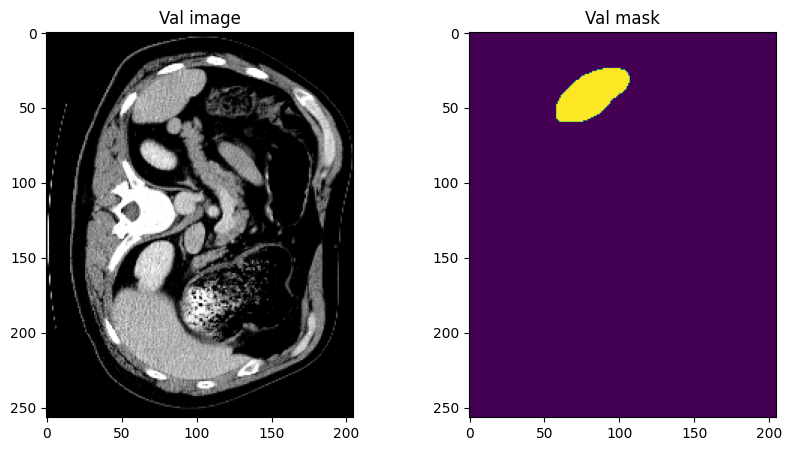

In [ ]:
# Visualize a val image and its mask
val_dataset = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(dataset=val_dataset, batch_size=1, num_workers=0)
check_valdata = next(iter(val_loader))
image2, label2 = check_valdata["image"][0, 0], check_valdata["label"][0, 0, :, :, :]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image2[:, :, 70], cmap="gray")
axs[0].set_title("Val image")
axs[1].imshow(label2[:, :, 70])
axs[1].set_title("Val mask")
plt.show()

In [ ]:
# Load data: training 32 and val 9
train_ds = CacheDataset(data=train_files, transform=train_transforms, cache_rate=1.0, num_workers=4)
train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4) ## use batch_size=2 to load images and use RandCropByPosNegLabeld to generate 2 x 4 images for network training
val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_rate=1.0, num_workers=4)
val_loader = DataLoader(val_ds, batch_size=1, num_workers=4)

Loading dataset: 100%|██████████| 4/4 [00:23<00:00,  5.92s/it]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loading dataset: 100%|██████████| 3/3 [00:06<00:00,  2.27s/it]


### ***Create UNet Architecture*** with DiceLoss and Adam optimizer

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")#torch.device("cuda:0")
print('Running...', device)
model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)
loss_function = DiceLoss(to_onehot_y=True, softmax=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-4)
dice_metric = DiceMetric(include_background=False, reduction="mean")

Running... cuda


### **Train model** 

---


> *Note*: ***The model trained here for 5 epochs to save time on training and one skip training to next section 'Evaluate Validation set' and download weights trained from 600 epochs to run inference.***


---

In [ ]:
max_epochs = 5
val_interval = 2
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = []
metric_values = []
post_pred = Compose([AsDiscrete(argmax=True, to_onehot=2)])
post_label = Compose([AsDiscrete(to_onehot=2)])

for epoch in range(max_epochs):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{max_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    for batch_data in train_loader:
        step += 1
        inputs, labels = (
            batch_data["image"].to(device),
            batch_data["label"].to(device),
        )
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(f"{step}/{len(train_ds) // train_loader.batch_size}, " f"train_loss: {loss.item():.4f}")
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            for val_data in val_loader:
                val_inputs, val_labels = (
                    val_data["image"].to(device),
                    val_data["label"].to(device),
                )
                roi_size = (160, 160, 160)
                sw_batch_size = 4
                val_outputs = sliding_window_inference(val_inputs, roi_size, sw_batch_size, model)
                val_outputs = [post_pred(i) for i in decollate_batch(val_outputs)]
                val_labels = [post_label(i) for i in decollate_batch(val_labels)]
                # compute metric for current iteration
                dice_metric(y_pred=val_outputs, y=val_labels)

            # aggregate the final mean dice result
            metric = dice_metric.aggregate().item()
            # reset the status for next validation round
            dice_metric.reset()

            metric_values.append(metric)
            if metric > best_metric:
                best_metric = metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), os.path.join(data_dir, "model_weights_5epoch.pth"))
                print("saved new best metric model")
            print(
                f"current epoch: {epoch + 1} current mean dice: {metric:.4f}"
                f"\nbest mean dice: {best_metric:.4f} "
                f"at epoch: {best_metric_epoch}"
            )
print(f"train completed, best_metric: {best_metric:.4f} " f"at epoch: {best_metric_epoch}")

----------
epoch 1/5
1/2, train_loss: 0.6745
2/2, train_loss: 0.6715
epoch 1 average loss: 0.6730
----------
epoch 2/5
1/2, train_loss: 0.6549
2/2, train_loss: 0.6764
epoch 2 average loss: 0.6656
saved new best metric model
current epoch: 2 current mean dice: 0.0341
best mean dice: 0.0341 at epoch: 2
----------
epoch 3/5
1/2, train_loss: 0.6485
2/2, train_loss: 0.6614
epoch 3 average loss: 0.6550
----------
epoch 4/5
1/2, train_loss: 0.6601
2/2, train_loss: 0.6519
epoch 4 average loss: 0.6560
current epoch: 4 current mean dice: 0.0308
best mean dice: 0.0341 at epoch: 2
----------
epoch 5/5
1/2, train_loss: 0.6458
2/2, train_loss: 0.6393
epoch 5 average loss: 0.6425
train completed, best_metric: 0.0341 at epoch: 2


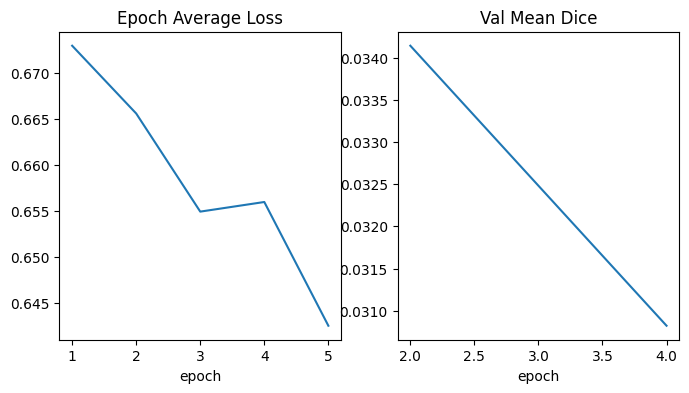

In [ ]:
# plot the loss
plt.figure("train", (8, 4))
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.title("Val Mean Dice")
x = [val_interval * (i + 1) for i in range(len(metric_values))]
y = metric_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.show()

### *Training loss and dice curve for 600 epochs*

<img src="https://i.ibb.co/b71mZW8/model-trained-600epochs.png" alt="model-trained-600epochs" border="0">

### **Evaluate Validation set**

In [ ]:
#Prepare validation set
val_org_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        Orientationd(keys=["image"], axcodes="RAS"),
        Spacingd(keys=["image"], pixdim=(1.5, 1.5, 2.0), mode="bilinear"),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-57,
            a_max=164,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        CropForegroundd(keys=["image"], source_key="image"),
    ]
)

val_org_ds = Dataset(data=val_files, transform=val_org_transforms)
val_org_loader = DataLoader(val_org_ds, batch_size=1, num_workers=4)

post_transforms = Compose(
    [
        Invertd(
            keys="pred",
            transform=val_org_transforms,
            orig_keys="image",
            meta_keys="pred_meta_dict",
            orig_meta_keys="image_meta_dict",
            meta_key_postfix="meta_dict",
            nearest_interp=False,
            to_tensor=True,
            device="cpu",
        ),
        AsDiscreted(keys="pred", argmax=True, to_onehot=2),
        AsDiscreted(keys="label", to_onehot=2),
    ]
)


In [ ]:
# Load model weight trained for 600 epochs
import gdown
gdown.download(
    "https://drive.google.com/uc?export=download&confirm=pbef&id=1AuaXXfMzjtPgRijnI4hjNESIFWnUJv7w",
    data_dir+"/Chapt8_2_best_metric_model_CT_Spleen.pth",
    quiet=True,
)
model.load_state_dict(torch.load('/content/sample_data/Chapt8_2_best_metric_model_CT_Spleen.pth'))

<All keys matched successfully>

### Dice on validation dataset

In [ ]:
with torch.no_grad():
    for val_data in val_org_loader:
        val_inputs = val_data["image"].to(device)
        roi_size = (160, 160, 160)
        sw_batch_size = 4
        val_data["pred"] = sliding_window_inference(val_inputs, roi_size, sw_batch_size, model)
        val_data = [post_transforms(i) for i in decollate_batch(val_data)]
        val_outputs, val_labels = from_engine(["pred", "label"])(val_data)
        # compute metric for current iteration
        dice_metric(y_pred=val_outputs, y=val_labels)

    # aggregate the final mean dice result
    metric_org = dice_metric.aggregate().item()
    # reset the status for next validation round
    dice_metric.reset()

print("Metric on original image spacing: ", metric_org)

Metric on original image spacing:  0.9634330868721008


### Inference on Test Set

In [ ]:
test_images = sorted(glob.glob(os.path.join(data_dir,  "Task09_Spleen","imagesTs", "*.nii.gz")))
print(test_images)
test_data = [{"image": image} for image in test_images]

test_org_transforms = Compose(
    [
        LoadImaged(keys="image"),
        EnsureChannelFirstd(keys="image"),
        Orientationd(keys=["image"], axcodes="RAS"),
        Spacingd(keys=["image"], pixdim=(1.5, 1.5, 2.0), mode="bilinear"),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-57,
            a_max=164,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        CropForegroundd(keys=["image"], source_key="image"),
    ]
)

test_org_ds = Dataset(data=test_data, transform=test_org_transforms)

test_org_loader = DataLoader(test_org_ds, batch_size=1, num_workers=4)

post_transforms = Compose(
    [
        Invertd(
            keys="pred",
            transform=test_org_transforms,
            orig_keys="image",
            meta_keys="pred_meta_dict",
            orig_meta_keys="image_meta_dict",
            meta_key_postfix="meta_dict",
            nearest_interp=False,
            to_tensor=True,
        ),
        AsDiscreted(keys="pred", argmax=True, to_onehot=2),
        SaveImaged(keys="pred", meta_keys="pred_meta_dict", output_dir="./out", output_postfix="seg", resample=False),
    ]
)

['/content/sample_data/Task09_Spleen/imagesTs/spleen_1.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_11.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_15.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_23.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_30.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_34.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_35.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_36.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_37.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_39.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_42.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_43.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_48.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_50.nii.gz', '/content/sample_data/Task09_Spleen/imagesTs/spleen_51.nii.gz', '/content/sample_data/Task09_Spleen/imag

In [ ]:
model.load_state_dict(torch.load(os.path.join(data_dir, "Chapt8_2_best_metric_model_CT_Spleen.pth")))
model.eval()
with torch.no_grad():
    for test_data in test_org_loader:
        test_inputs = test_data["image"].to(device)
        roi_size = (160, 160, 160)
        sw_batch_size = 4
        test_data["pred"] = sliding_window_inference(test_inputs, roi_size, sw_batch_size, model)
        test_data = [post_transforms(i) for i in decollate_batch(test_data)]

        test_outputs = from_engine(["pred"])(test_data)
        print(test_outputs[0].shape)
        
        # If there is test label present, uncomment below lines to compute metric
        # test_outputs, test_labels = from_engine(["pred", "label"])(test_data)      
        # dice_metric(y_pred=test_outputs, y=test_labels)    
        # print("Metric on original image spacing: ", dice_metric)

2023-05-26 17:53:19,704 INFO image_writer.py:197 - writing: out/spleen_1/spleen_1_seg.nii.gz
torch.Size([2, 512, 512, 34])
2023-05-26 17:53:28,295 INFO image_writer.py:197 - writing: out/spleen_11/spleen_11_seg.nii.gz
torch.Size([2, 512, 512, 157])
2023-05-26 17:53:41,988 INFO image_writer.py:197 - writing: out/spleen_15/spleen_15_seg.nii.gz
torch.Size([2, 512, 512, 38])
2023-05-26 17:53:45,637 INFO image_writer.py:197 - writing: out/spleen_23/spleen_23_seg.nii.gz
torch.Size([2, 512, 512, 102])
2023-05-26 17:53:52,212 INFO image_writer.py:197 - writing: out/spleen_30/spleen_30_seg.nii.gz
torch.Size([2, 512, 512, 96])
2023-05-26 17:53:58,245 INFO image_writer.py:197 - writing: out/spleen_34/spleen_34_seg.nii.gz
torch.Size([2, 512, 512, 48])
2023-05-26 17:54:00,684 INFO image_writer.py:197 - writing: out/spleen_35/spleen_35_seg.nii.gz
torch.Size([2, 512, 512, 50])
2023-05-26 17:54:05,202 INFO image_writer.py:197 - writing: out/spleen_36/spleen_36_seg.nii.gz
torch.Size([2, 512, 512, 94])


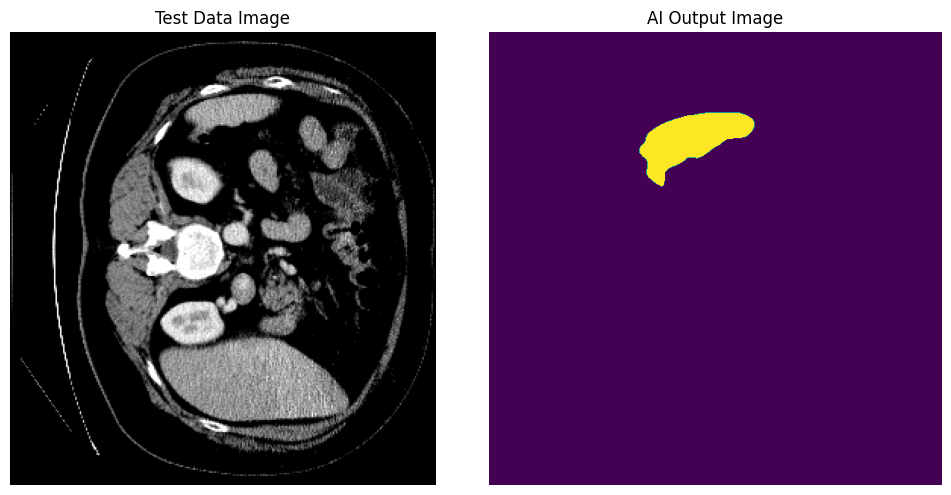

In [ ]:
# Visualize the test data output
test_input_image = test_inputs[0].cpu().numpy()
test_output_image = test_outputs[0][1].cpu().numpy()
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Display the test data image for 50th slice
axs[0].imshow(test_input_image[0, :, :, 50], cmap='gray')
axs[0].set_title('Test Data Image')
axs[0].axis('off')
# Display the test output image in the second subplot
axs[1].imshow(test_output_image[:, :, 50])
axs[1].set_title('AI Output Image')
axs[1].axis('off')
# Adjust spacing between subplots
plt.tight_layout()
# Show the figure with side by side images
plt.show()

#=======================================================#

# ======================================================= #

# **B. VNET: Tutorial for spleen Segmentation with Monai/Torch**

In [ ]:
## Install and Import Library
!python -c "import monai" || pip install -q "monai-weekly[gdown, nibabel, tqdm, ignite]"
!python -c "import matplotlib" || pip install -q matplotlib
!python -c "import nibabel as nib" || pip install -q nibabel
import os
import numpy as np
import glob
import tempfile
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
%matplotlib inline
import matplotlib.pyplot as plt

# Set device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

2023-05-26 17:55:07.942288: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
from monai.losses import DiceLoss, DiceCELoss
from monai.metrics import DiceMetric
from monai.utils import first, set_determinism
from monai.transforms import (
    AsDiscrete,
    AsDiscreted,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Resized,
    Orientationd,
    RandCropByPosNegLabeld,
    SaveImaged,
    ScaleIntensityRanged,
    Spacingd,
    Invertd,
)
from monai.handlers.utils import from_engine
from monai.inferers import sliding_window_inference
from monai.data import CacheDataset, DataLoader, Dataset, decollate_batch
from monai.config import print_config
from monai.apps import download_and_extract
print_config()

MONAI version: 1.2.dev2321
Numpy version: 1.22.4
Pytorch version: 2.0.1+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: c1ea24210a470b43332534046fa531efd84d9df1
MONAI __file__: /usr/local/lib/python3.10/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 3.0.2
scikit-image version: 0.19.3
Pillow version: 8.4.0
Tensorboard version: 2.12.2
gdown version: 4.6.6
TorchVision version: 0.15.2+cu118
tqdm version: 4.65.0
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.5
pandas version: 1.5.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-r

In [ ]:
# Define model
#This VNET model structure can be found on monai at https://docs.monai.io/en/stable/_modules/monai/networks/nets/vnet.html 
from typing import Dict, Optional, Tuple, Type, Union
from monai.networks.blocks.convolutions import Convolution
from monai.networks.layers.factories import Act, Conv, Dropout, Norm, split_args

__all__ = ["VNet"]


def get_acti_layer(act: Union[Tuple[str, Dict], str], nchan: int = 0):
    if act == "prelu":
        act = ("prelu", {"num_parameters": nchan})
    act_name, act_args = split_args(act)
    act_type = Act[act_name]
    return act_type(**act_args)


class LUConv(nn.Module):
    def __init__(self, spatial_dims: int, nchan: int, act: Union[Tuple[str, Dict], str], bias: bool = False):
        super().__init__()

        self.act_function = get_acti_layer(act, nchan)
        self.conv_block = Convolution(
            spatial_dims=spatial_dims,
            in_channels=nchan,
            out_channels=nchan,
            kernel_size=5,
            act=None,
            norm=Norm.BATCH,
            bias=bias,
        )

    def forward(self, x):
        out = self.conv_block(x)
        out = self.act_function(out)
        return out


def _make_nconv(spatial_dims: int, nchan: int, depth: int, act: Union[Tuple[str, Dict], str], bias: bool = False):
    layers = []
    for _ in range(depth):
        layers.append(LUConv(spatial_dims, nchan, act, bias))
    return nn.Sequential(*layers)


class InputTransition(nn.Module):
    def __init__(
        self,
        spatial_dims: int,
        in_channels: int,
        out_channels: int,
        act: Union[Tuple[str, Dict], str],
        bias: bool = False,
    ):
        super().__init__()

        if out_channels % in_channels != 0:
            raise ValueError(
                f"out channels should be divisible by in_channels. Got in_channels={in_channels}, out_channels={out_channels}."
            )

        self.spatial_dims = spatial_dims
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.act_function = get_acti_layer(act, out_channels)
        self.conv_block = Convolution(
            spatial_dims=spatial_dims,
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=5,
            act=None,
            norm=Norm.BATCH,
            bias=bias,
        )

    def forward(self, x):
        out = self.conv_block(x)
        repeat_num = self.out_channels // self.in_channels
        x16 = x.repeat([1, repeat_num, 1, 1, 1][: self.spatial_dims + 2])
        out = self.act_function(torch.add(out, x16))
        return out


class DownTransition(nn.Module):
    def __init__(
        self,
        spatial_dims: int,
        in_channels: int,
        nconvs: int,
        act: Union[Tuple[str, Dict], str],
        dropout_prob: Optional[float] = None,
        dropout_dim: int = 3,
        bias: bool = False,
    ):
        super().__init__()

        conv_type: Type[Union[nn.Conv2d, nn.Conv3d]] = Conv[Conv.CONV, spatial_dims]
        norm_type: Type[Union[nn.BatchNorm2d, nn.BatchNorm3d]] = Norm[Norm.BATCH, spatial_dims]
        dropout_type: Type[Union[nn.Dropout, nn.Dropout2d, nn.Dropout3d]] = Dropout[Dropout.DROPOUT, dropout_dim]

        out_channels = 2 * in_channels
        self.down_conv = conv_type(in_channels, out_channels, kernel_size=2, stride=2, bias=bias)
        self.bn1 = norm_type(out_channels)
        self.act_function1 = get_acti_layer(act, out_channels)
        self.act_function2 = get_acti_layer(act, out_channels)
        self.ops = _make_nconv(spatial_dims, out_channels, nconvs, act, bias)
        self.dropout = dropout_type(dropout_prob) if dropout_prob is not None else None

    def forward(self, x):
        down = self.act_function1(self.bn1(self.down_conv(x)))
        if self.dropout is not None:
            out = self.dropout(down)
        else:
            out = down
        out = self.ops(out)
        out = self.act_function2(torch.add(out, down))
        return out


class UpTransition(nn.Module):
    def __init__(
        self,
        spatial_dims: int,
        in_channels: int,
        out_channels: int,
        nconvs: int,
        act: Union[Tuple[str, Dict], str],
        dropout_prob: Optional[float] = None,
        dropout_dim: int = 3,
    ):
        super().__init__()

        conv_trans_type: Type[Union[nn.ConvTranspose2d, nn.ConvTranspose3d]] = Conv[Conv.CONVTRANS, spatial_dims]
        norm_type: Type[Union[nn.BatchNorm2d, nn.BatchNorm3d]] = Norm[Norm.BATCH, spatial_dims]
        dropout_type: Type[Union[nn.Dropout, nn.Dropout2d, nn.Dropout3d]] = Dropout[Dropout.DROPOUT, dropout_dim]

        self.up_conv = conv_trans_type(in_channels, out_channels // 2, kernel_size=2, stride=2)
        self.bn1 = norm_type(out_channels // 2)
        self.dropout = dropout_type(dropout_prob) if dropout_prob is not None else None
        self.dropout2 = dropout_type(0.5)
        self.act_function1 = get_acti_layer(act, out_channels // 2)
        self.act_function2 = get_acti_layer(act, out_channels)
        self.ops = _make_nconv(spatial_dims, out_channels, nconvs, act)

    def forward(self, x, skipx):
        if self.dropout is not None:
            out = self.dropout(x)
        else:
            out = x
        skipxdo = self.dropout2(skipx)
        out = self.act_function1(self.bn1(self.up_conv(out)))
        xcat = torch.cat((out, skipxdo), 1)
        out = self.ops(xcat)
        out = self.act_function2(torch.add(out, xcat))
        return out


class OutputTransition(nn.Module):
    def __init__(
        self,
        spatial_dims: int,
        in_channels: int,
        out_channels: int,
        act: Union[Tuple[str, Dict], str],
        bias: bool = False,
    ):
        super().__init__()

        conv_type: Type[Union[nn.Conv2d, nn.Conv3d]] = Conv[Conv.CONV, spatial_dims]

        self.act_function1 = get_acti_layer(act, out_channels)
        self.conv_block = Convolution(
            spatial_dims=spatial_dims,
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=5,
            act=None,
            norm=Norm.BATCH,
            bias=bias,
        )
        self.conv2 = conv_type(out_channels, out_channels, kernel_size=1)

    def forward(self, x):
        # convolve 32 down to 2 channels
        out = self.conv_block(x)
        out = self.act_function1(out)
        out = self.conv2(out)
        return out


class VNet(nn.Module):
    """
    V-Net based on `Fully Convolutional Neural Networks for Volumetric Medical Image Segmentation
    <https://arxiv.org/pdf/1606.04797.pdf>`_.
    Adapted from `the official Caffe implementation
    <https://github.com/faustomilletari/VNet>`_. and `another pytorch implementation
    <https://github.com/mattmacy/vnet.pytorch/blob/master/vnet.py>`_.
    The model supports 2D or 3D inputs.

    Args:
        spatial_dims: spatial dimension of the input data. Defaults to 3.
        in_channels: number of input channels for the network. Defaults to 1.
            The value should meet the condition that ``16 % in_channels == 0``.
        out_channels: number of output channels for the network. Defaults to 1.
        act: activation type in the network. Defaults to ``("elu", {"inplace": True})``.
        dropout_prob: dropout ratio. Defaults to 0.5.
        dropout_dim: determine the dimensions of dropout. Defaults to 3.

            - ``dropout_dim = 1``, randomly zeroes some of the elements for each channel.
            - ``dropout_dim = 2``, Randomly zeroes out entire channels (a channel is a 2D feature map).
            - ``dropout_dim = 3``, Randomly zeroes out entire channels (a channel is a 3D feature map).
        bias: whether to have a bias term in convolution blocks. Defaults to False.
            According to `Performance Tuning Guide <https://pytorch.org/tutorials/recipes/recipes/tuning_guide.html>`_,
            if a conv layer is directly followed by a batch norm layer, bias should be False.

    """

    def __init__(
        self,
        spatial_dims: int = 3,
        in_channels: int = 1,
        out_channels: int = 1,
        act: Union[Tuple[str, Dict], str] = ("elu", {"inplace": True}),
        dropout_prob: float = 0.5,
        dropout_dim: int = 3,
        bias: bool = False,
    ):
        super().__init__()

        if spatial_dims not in (2, 3):
            raise AssertionError("spatial_dims can only be 2 or 3.")

        self.in_tr = InputTransition(spatial_dims, in_channels, 16, act, bias=bias)
        self.down_tr32 = DownTransition(spatial_dims, 16, 1, act, bias=bias)
        self.down_tr64 = DownTransition(spatial_dims, 32, 2, act, bias=bias)
        self.down_tr128 = DownTransition(spatial_dims, 64, 3, act, dropout_prob=dropout_prob, bias=bias)
        self.down_tr256 = DownTransition(spatial_dims, 128, 2, act, dropout_prob=dropout_prob, bias=bias)
        self.up_tr256 = UpTransition(spatial_dims, 256, 256, 2, act, dropout_prob=dropout_prob)
        self.up_tr128 = UpTransition(spatial_dims, 256, 128, 2, act, dropout_prob=dropout_prob)
        self.up_tr64 = UpTransition(spatial_dims, 128, 64, 1, act)
        self.up_tr32 = UpTransition(spatial_dims, 64, 32, 1, act)
        self.out_tr = OutputTransition(spatial_dims, 32, out_channels, act, bias=bias)

    def forward(self, x):
        out16 = self.in_tr(x)
        out32 = self.down_tr32(out16)
        out64 = self.down_tr64(out32)
        out128 = self.down_tr128(out64)
        out256 = self.down_tr256(out128)
        x = self.up_tr256(out256, out128)
        x = self.up_tr128(x, out64)
        x = self.up_tr64(x, out32)
        x = self.up_tr32(x, out16)
        x = self.out_tr(x)
        return x

### Prepare dataset and dataloader

In [ ]:
import os
import tempfile
import urllib.request
import tarfile

data_dir = "/content/sample_data"
os.makedirs(data_dir, exist_ok=True)

In [ ]:
url = "https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar"
md5 = "410d4a301da4e5b2f6f86ec3ddba524e"

compressed_file = os.path.join(data_dir, "Task09_Spleen.tar")
extracted_data=os.path.join(data_dir, "Task09_Spleen")

# download data
if not os.path.exists(extracted_data):
  if not os.path.exists(compressed_file):
    print('Downloading data')
    with urllib.request.urlopen(url) as u:
        with open(compressed_file, 'wb') as f:
            f.write(u.read())
    # extract data
    print("Data downloaded and now extracting!")
    with tarfile.open(compressed_file, 'r') as tar:
      tar.extractall(data_dir)
if os.path.exists(compressed_file):
  os.remove(compressed_file)
    
print("Data ready to use!")

Data ready to use!


In [ ]:
# Provide path to images and mask.
CT_data = os.path.join(data_dir, 'Task09_Spleen')
train_images = sorted(glob.glob(os.path.join(CT_data, "imagesTr", "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(CT_data, "labelsTr", "*.nii.gz")))
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
#split last 9 images for validation
train_files, val_files = data_dicts[-14:-9], data_dicts[-3:] # Model run out of memory for large data set so choose  5 images
set_determinism(seed=0) #Set deterministic training for reproducibility

In [ ]:
train_transforms = Compose([
        LoadImaged(keys=["image", "label"],image_only=False),
        EnsureChannelFirstd(keys=["image", "label"], channel_dim='no_channel'),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
#         Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),
#         CropForegroundd(keys=["image", "label"], source_key="image"),
        Resized(keys=["image", "label"], spatial_size=(128, 128, 64)),
#         ScaleIntensityRanged(
#             keys=["image"],
#             a_min=-57,
#             a_max=164,
#             b_min=0.0,
#             b_max=1.0,
#             clip=True,
#         ),
#         RandCropByPosNegLabeld(
#             keys=["image", "label"],
#             label_key="label",
#             spatial_size=(96,96,96),
#             pos=1,
#             neg=1,
#             num_samples=4,
#             image_key="image",
#             image_threshold=0,
#          ),
])
val_transforms = Compose([
        LoadImaged(keys=["image", "label"],image_only=False),
        EnsureChannelFirstd(keys=["image", "label"], channel_dim='no_channel'),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
#         Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),
#         CropForegroundd(keys=["image", "label"], source_key="image"),
        Resized(keys=["image", "label"], spatial_size=(128, 128, 64)),
#         ScaleIntensityRanged(
#             keys=["image"],
#             a_min=-57,
#             a_max=164,
#             b_min=0.0,
#             b_max=1.0,
#             clip=True,
#         ),
        
])

In [ ]:
# Define the dataset
train_dataset = Dataset(data=train_files, transform=train_transforms)
val_dataset = Dataset(data=val_files, transform=val_transforms)

# Define the dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=0)

train_size = len(train_dataset)
val_size = len(val_dataset)
print("Training dataset size:", train_size)
print("Validation dataset size:", val_size)

Training dataset size: 5
Validation dataset size: 3


image shape: torch.Size([128, 128, 64]), label shape: torch.Size([128, 128, 64])


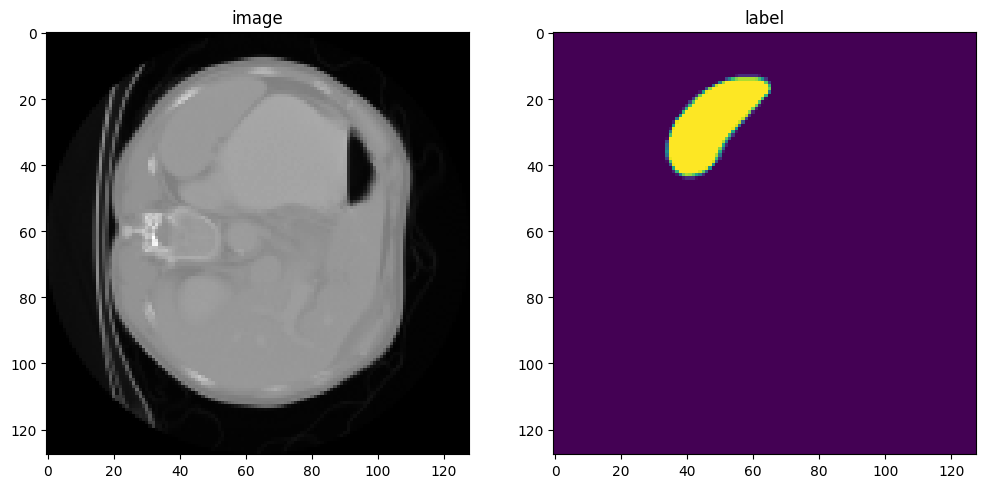

In [ ]:
# Visualize an image and its mask
check_ds = Dataset(data=train_files, transform=train_transforms)
check_loader = DataLoader(check_ds, batch_size=1)
check_data = first(check_loader)
image, label = (check_data["image"][0][0], check_data["label"][0][0])
print(f"image shape: {image.shape}, label shape: {label.shape}")
# plot the slice [:, :,50]
plt.figure("check", (12, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :,50], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, 50])
plt.show()

In [ ]:
# Create an instance of the VNet model
print(device)
model = VNet()
model.to(device)
# Reshape input image and label tensors (228,228,113)
image = torch.randn(1, 1, 128, 128, 64).to(device)  # Example input image tensor with the correct spatial dimensions
image = image.to(device)
print(image.shape)
# Forward pass
output = model(image)
# Print output shape
print(output.shape)


cuda
torch.Size([1, 1, 128, 128, 64])
torch.Size([1, 1, 128, 128, 64])


In [ ]:
# Define model
in_channels=1
out_channels=1
max_epochs=5
best_metric = -1  # Store the best Dice coefficient
best_metric_model = None  # Store the model with the best Dice coefficient
epoch_loss_values = []
val_interval = 2
metric_values = []

# Define loss function
loss_function =DiceLoss(sigmoid=True)# DiceLoss(to_onehot_y=True, softmax=True)
# loss_function =DiceCELoss(include_background=False)
# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-6)
# Define Dice metric
dice_metric = DiceMetric(include_background=False, reduction="mean")

### Training model

In [ ]:
model = VNet()#in_channels, out_channels
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(max_epochs):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{max_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    dice_metric = DiceMetric(include_background=False, reduction="mean")  # Initialize inside the epoch loop
    for batch in train_dataloader:
        step += 1
        inputs, masks = batch["image"], batch["label"]
        inputs = inputs.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Compute loss
        loss = loss_function(outputs, masks)
        # Backward pass
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(f"{step}/{len(train_dataset) // train_dataloader.batch_size}, " f"train_loss: {loss.item():.4f}")
    epoch_loss /=step #= epoch_loss / len(train_dataloader)
    epoch_loss_values.append(epoch_loss)
    
    print(f"Epoch [{epoch+1}/{max_epochs}], average loss: {epoch_loss:.4f}")
    
    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            val_loss = 0.0

            for val_batch in val_dataloader:
                val_inputs, val_masks = val_batch["image"], val_batch["label"]
                val_inputs = val_inputs.to(device)
                val_masks = val_masks.to(device)

                val_outputs = model(val_inputs)
                val_loss += loss_function(val_outputs, val_masks).item()

                dice_metric(y_pred=val_outputs, y=val_masks)

            val_loss /= step #len(val_dataloader)
            dice_coefficient = dice_metric.aggregate().item()
            dice_metric.reset()
            print(f"Validation Loss: {val_loss:.4f}, Dice Coefficient: {dice_coefficient:.4f}")
            metric_values.append(dice_coefficient)
            
            # Check if the current Dice coefficient is the best so far
            if dice_coefficient > best_metric:
                best_metric = dice_coefficient
                best_metric_epoch = epoch + 1
                #torch.save(best_metric_model, 'best_metric_model5.pth')
                torch.save(model.state_dict(), os.path.join(data_dir, "Chapt8_2VNet_best_metric_model.pth"))
                print("saved new best metric model")
                print(f"current epoch: {epoch + 1} current mean dice: {dice_coefficient:.4f}"
                    f"\nbest mean dice: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}")

# Save the final model
torch.save(model.state_dict(), os.path.join(data_dir,'Chapt8_2_trained_model5epochs.pth'))

----------
epoch 1/5
1/2, train_loss: 0.9922
2/2, train_loss: 0.9956
3/2, train_loss: 0.9874
Epoch [1/5], average loss: 0.9917
----------
epoch 2/5
1/2, train_loss: 0.9883
2/2, train_loss: 0.9964
3/2, train_loss: 0.9937
Epoch [2/5], average loss: 0.9928
Validation Loss: 0.9822, Dice Coefficient: 0.0000
saved new best metric model
current epoch: 2 current mean dice: 0.0000
best mean dice: 0.0000 at epoch: 2
----------
epoch 3/5
1/2, train_loss: 0.9944
2/2, train_loss: 0.9885
3/2, train_loss: 0.9974
Epoch [3/5], average loss: 0.9934
----------
epoch 4/5
1/2, train_loss: 0.9955
2/2, train_loss: 0.9885
3/2, train_loss: 0.9954
Epoch [4/5], average loss: 0.9931
Validation Loss: 0.9821, Dice Coefficient: 0.0000
----------
epoch 5/5
1/2, train_loss: 0.9914
2/2, train_loss: 0.9916
3/2, train_loss: 0.9974
Epoch [5/5], average loss: 0.9935


### Let's evaluate model on validation data performance

In [ ]:
# Load model and weight
#import gdown
#gdown.download("https://drive.google.com/uc?export=download&confirm=pbef&id=1AuaXXfMzjtPgRijnI4hjNESIFWnUJv7w", data_dir+"/Chapt8_2_best_metric_model_CT_Spleen.pth",quiet=True,)
#model.load_state_dict(torch.load('/content/sample_data/Chapt8_2_best_metric_model_CT_Spleen.pth'))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VNet(in_channels=1, out_channels=1)
model.load_state_dict(torch.load(os.path.join(data_dir,"Chapt8_2_trained_model5epochs.pth")))
model.to(device)

model.eval()
with torch.no_grad():
    dice_metric = DiceMetric(include_background=False, reduction="mean")
    for test_batch in val_dataloader:  # Use validation dataloader for testing
        test_inputs, test_masks = test_batch["image"], test_batch["label"]

        test_inputs = test_inputs.to(device)
        test_masks = test_masks.to(device)

        test_outputs = model(test_inputs)
        if test_masks.shape != test_outputs.shape:
            test_masks = torch.nn.functional.interpolate(test_masks, size=test_outputs.shape[2:], mode="nearest")

        # print(f"test_outputs: {test_inputs.shape}")
        # print(f"test_masks: {test_inputs.shape}")

        dice_metric(y_pred=test_outputs, y=test_masks)

    dice_coefficient = dice_metric.aggregate().item()

print(f"Dice Coefficient: {dice_coefficient:.4f}")

Dice Coefficient: 0.0000


**Note:** One may try to train the VNET model with large dataset and augmentation outside colab to avoid memory issue and get meaningful dice.

### Inference of Test Data: 

In [ ]:
import nibabel as nib
from scipy.ndimage import zoom

# Get the paths of all the images in the imagesTs folder
image_paths = sorted(glob.glob(os.path.join(data_dir, 'Task09_Spleen/imagesTs', '*.nii.gz')))
mask_output_dir = os.path.join(data_dir, 'predicted_masks')

# Load the trained model
model = VNet()
model.load_state_dict(torch.load(os.path.join(data_dir, "Chapt8_2_trained_model5epochs.pth")))
model.to(device)
model.eval()

# Create the output directory if it doesn't exist
os.makedirs(mask_output_dir, exist_ok=True)

# Iterate over the image paths
for image_path in image_paths:
  print(image_path)
  # Load the image
  image1 = nib.load(image_path)
  image = image1.get_fdata()
  target_size=(128,128,64) 
  resize_factors = [target_size[i] / np.array(image).shape[i] for i in range(len(target_size))]
  resized_image = zoom(image, resize_factors)
  print(resized_image.shape)
  #image = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).to(device)  
  image_tensor = torch.from_numpy(resized_image).unsqueeze(0).unsqueeze(0).float().to(device) # Add batch and channel dimensions
  # Perform inference
  with torch.no_grad():
      output = model(image_tensor)
      
  # Process the output as needed (e.g., convert to numpy array, apply thresholding, etc.)
  output = output.argmax(dim=1).squeeze().cpu().numpy()
  # or output = np.argmax(output_array, axis=0)

  # Create the mask file path
  image_filename = os.path.basename(image_path)
  mask_filename = image_filename.replace('image', 'mask')
  mask_filepath = os.path.join(mask_output_dir, mask_filename)

  # Save the mask as a Nifti file
  # mask_nifti = nib.Nifti1Image(output.astype(np.float64), affine=image1.affine)
  # nib.save(mask_nifti, mask_filepath)

  print(f"Done with: {mask_filepath}")
  

/content/sample_data/Task09_Spleen/imagesTs/spleen_1.nii.gz
(128, 128, 64)
Done with: /content/sample_data/predicted_masks/spleen_1.nii.gz
/content/sample_data/Task09_Spleen/imagesTs/spleen_11.nii.gz
(128, 128, 64)
Done with: /content/sample_data/predicted_masks/spleen_11.nii.gz
/content/sample_data/Task09_Spleen/imagesTs/spleen_15.nii.gz
(128, 128, 64)
Done with: /content/sample_data/predicted_masks/spleen_15.nii.gz
/content/sample_data/Task09_Spleen/imagesTs/spleen_23.nii.gz
(128, 128, 64)
Done with: /content/sample_data/predicted_masks/spleen_23.nii.gz
/content/sample_data/Task09_Spleen/imagesTs/spleen_30.nii.gz
(128, 128, 64)
Done with: /content/sample_data/predicted_masks/spleen_30.nii.gz
/content/sample_data/Task09_Spleen/imagesTs/spleen_34.nii.gz
(128, 128, 64)
Done with: /content/sample_data/predicted_masks/spleen_34.nii.gz
/content/sample_data/Task09_Spleen/imagesTs/spleen_35.nii.gz
(128, 128, 64)
Done with: /content/sample_data/predicted_masks/spleen_35.nii.gz
/content/sample

In [ ]:
# If their is mask available for test set, one may calculate the dice coeff for testset by adding: 
"""
output = torch.from_numpy(output).unsqueeze(0).unsqueeze(0).float()
mask = torch.from_numpy(mask).unsqueeze(0).unsqueeze(0).float()
dice_metric = DiceMetric(include_background=False, reduction="mean")
dice = dice_metric(y_pred=output, y=mask) #Calculate the Dice coefficient
print(f"Dice Coefficient: {dice:.4f}")
"""

'\noutput = torch.from_numpy(output).unsqueeze(0).unsqueeze(0).float()\nmask = torch.from_numpy(mask).unsqueeze(0).unsqueeze(0).float()\ndice_metric = DiceMetric(include_background=False, reduction="mean")\ndice = dice_metric(y_pred=output, y=mask) #Calculate the Dice coefficient\nprint(f"Dice Coefficient: {dice:.4f}")\n'

---

##***Feedback***

*Now that you have completed this chapter, we would be very grateful if you spend a few minutes of your time to answer a short survey about this chapter. We highly value your feedback and will do our best to leverage this to improve our educational content and/or strategies.*

[Click here to begin the survey!](https://docs.google.com/forms/d/e/1FAIpQLSddhdaAmeHmrKKRNXCLIQH6_mnIC3KR7XlDIVWGt3FSQhPDhQ/viewform)